In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
innovation = pd.read_csv('innovation_rates_by_college.csv')
innovation.rename(columns={
    'instnm':'college_name',
    'count': 'total_students',
    'count_pq1': 'lower_class',
    'count_pq2': 'lower_middle_class',
    'count_pq3': 'middle_class',
    'count_pq4': 'upper-middle_class',
    'count_pq5': 'upper_class',
    'inventor_pq1': 'lower_class_inventor',
    'inventor_pq2': 'lower-middle_class_inventor',
    'inventor_pq3': 'middle_class_inventor',
    'inventor_pq4': 'upper_middle_class_inventor',
    'inventor_pq5': 'upper_class_inventor',
    'top5cit': 'top5citedinventors'}, inplace=True)
innovation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   super_opeid                  423 non-null    int64  
 1   college_name                 423 non-null    object 
 2   total_students               423 non-null    int64  
 3   lower_class                  423 non-null    int64  
 4   lower_middle_class           423 non-null    int64  
 5   middle_class                 423 non-null    int64  
 6   upper-middle_class           423 non-null    int64  
 7   upper_class                  423 non-null    int64  
 8   inventor                     423 non-null    float64
 9   lower_class_inventor         423 non-null    float64
 10  lower-middle_class_inventor  423 non-null    float64
 11  middle_class_inventor        423 non-null    float64
 12  upper_middle_class_inventor  423 non-null    float64
 13  upper_class_inventor

In [64]:
drop = [0]
innovation = innovation.drop(innovation.columns[drop], axis=1)
innovation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college_name                 423 non-null    object 
 1   total_students               423 non-null    int64  
 2   lower_class                  423 non-null    int64  
 3   lower_middle_class           423 non-null    int64  
 4   middle_class                 423 non-null    int64  
 5   upper-middle_class           423 non-null    int64  
 6   upper_class                  423 non-null    int64  
 7   inventor                     423 non-null    float64
 8   lower_class_inventor         423 non-null    float64
 9   lower-middle_class_inventor  423 non-null    float64
 10  middle_class_inventor        423 non-null    float64
 11  upper_middle_class_inventor  423 non-null    float64
 12  upper_class_inventor         423 non-null    float64
 13  top5citedinventors  

In [65]:
baseline = pd.read_csv('baseline_cross-sec_estimates.csv')
baseline.rename(columns={
    'name':'college_name',
}, inplace=True)
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   super_opeid           2202 non-null   int64  
 1   college_name          2202 non-null   object 
 2   type                  2199 non-null   float64
 3   tier                  2202 non-null   int64  
 4   tier_name             2202 non-null   object 
 5   iclevel               2199 non-null   float64
 6   region                2199 non-null   float64
 7   state                 2199 non-null   object 
 8   cz                    2199 non-null   float64
 9   czname                2199 non-null   object 
 10  cfips                 2199 non-null   float64
 11  county                2190 non-null   object 
 12  multi                 2199 non-null   float64
 13  count                 2202 non-null   float64
 14  female                2183 non-null   float64
 15  k_married            

In [66]:
region_mapping = {
    1: 'Northeast',
    2: 'Midwest',
    3: 'South',
    4: 'West'
}

baseline['region'] = baseline['region'].map(region_mapping).astype('category')


In [67]:
type_mapping = {
    1: 'Public',
    2: 'Private non-profit',
    3: 'For-profit'
}

baseline['type'] = baseline['type'].map(type_mapping).astype('category')


In [68]:

tier_mapping = {
    1: 'Ivy Plus',
    2: 'Other elite schools (public and private)',
    3: 'Highly selective public schools',
    4: 'Highly selective private schools',
    5: 'Selective public',
    6: 'Selective private',
    7: 'Non-selective 4-year public',
    8: 'Non-selective 4-year private non-profit',
    9: 'Two-year (public and private non-profit)',
    10: 'Four-year for-profit',
    11: 'Two-year-for-profit',
    12: 'Less than two-year of any type',
    13: 'Attending college with insufficient data',
    14: 'Not attending college'
}

baseline['tier'] = baseline['tier'].map(tier_mapping).astype('category')


In [69]:

iclevel_mapping = {
    1: 'Four-year',
    2: 'Two-year',
    3: 'Less than two-year'
}

baseline['iclevel'] = baseline['iclevel'].map(iclevel_mapping).astype('category')


In [70]:

baseline['multi'] = baseline['multi'].astype('bool')
baseline.rename(columns={
    'count': 'avg_students_per_cohort',
    'female': 'frac_female_per_cohort',
    'k_married': 'frac_married_per_cohort'}, inplace=True)

In [71]:
drop = [0,4,7,8,9,10,11,83,84]
baseline = baseline.drop(baseline.columns[drop], axis=1)
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 76 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   college_name             2202 non-null   object  
 1   type                     2199 non-null   category
 2   tier                     2202 non-null   category
 3   iclevel                  2199 non-null   category
 4   region                   2199 non-null   category
 5   multi                    2202 non-null   bool    
 6   avg_students_per_cohort  2202 non-null   float64 
 7   frac_female_per_cohort   2183 non-null   float64 
 8   frac_married_per_cohort  2202 non-null   float64 
 9   mr_kq5_pq1               2202 non-null   float64 
 10  mr_ktop1_pq1             2202 non-null   float64 
 11  par_mean                 2202 non-null   float64 
 12  par_median               2202 non-null   int64   
 13  par_rank                 2202 non-null   float64 
 14  par_q1  

In [72]:
merged_df = pd.merge(innovation, baseline, on='college_name')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college_name                 422 non-null    object  
 1   total_students               422 non-null    int64   
 2   lower_class                  422 non-null    int64   
 3   lower_middle_class           422 non-null    int64   
 4   middle_class                 422 non-null    int64   
 5   upper-middle_class           422 non-null    int64   
 6   upper_class                  422 non-null    int64   
 7   inventor                     422 non-null    float64 
 8   lower_class_inventor         422 non-null    float64 
 9   lower-middle_class_inventor  422 non-null    float64 
 10  middle_class_inventor        422 non-null    float64 
 11  upper_middle_class_inventor  422 non-null    float64 
 12  upper_class_inventor         422 non-null    float64 
 13  top5c

In [73]:
college = pd.read_csv('college_level_characteristics.csv')
college.rename(columns={
    'name':'college_name',
}, inplace=True)
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   super_opeid                       2463 non-null   int64  
 1   college_name                      2463 non-null   object 
 2   region                            2463 non-null   int64  
 3   state                             2463 non-null   object 
 4   fips                              2463 non-null   int64  
 5   cz                                2463 non-null   int64  
 6   czname                            2463 non-null   object 
 7   cfips                             2463 non-null   int64  
 8   county                            2449 non-null   object 
 9   zip                               2463 non-null   int64  
 10  tier                              2463 non-null   int64  
 11  tier_name                         2463 non-null   object 
 12  type  

In [74]:
college['hbcu'] = college['hbcu'].astype('bool')
college['flagship'] = college['flagship'].astype('bool')
college['public'] = college['public'].astype('bool')
barrons_mapping = {
    1 : 'Elite',
    2 : 'Highly Selective',
    3: 'Selective',
    4: 'Selective',
    5: 'Selective',
    9: 'Special',
    999: 'Non-selective'
}

college['barrons'] = college['barrons'].map(barrons_mapping).astype('category')

In [75]:
drop = [0,2,3,4,5,6,7,8,9,10,11,12,13,18,29,30]
college = college.drop(college.columns[drop], axis=1)
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   college_name                      2463 non-null   object  
 1   public                            2463 non-null   bool    
 2   barrons                           2463 non-null   category
 3   exp_instr_pc_2000                 2381 non-null   float64 
 4   exp_instr_pc_2013                 2455 non-null   float64 
 5   hbcu                              2463 non-null   bool    
 6   flagship                          2463 non-null   bool    
 7   ipeds_enrollment_2013             2463 non-null   int64   
 8   ipeds_enrollment_2000             2415 non-null   float64 
 9   sticker_price_2013                2270 non-null   float64 
 10  sticker_price_2000                2160 non-null   float64 
 11  grad_rate_150_p_2013              2217 non-null   float6

In [76]:
merged_df2 = pd.merge(merged_df, college, on='college_name')
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Columns: 123 entries, college_name to pct_tradepersonal_2000
dtypes: bool(4), category(5), float64(101), int64(12), object(1)
memory usage: 381.0+ KB


In [77]:
import pandas as pd

# Assuming df is your DataFrame
# Count of nulls
null_count = merged_df2['endowment_pc_2000'].isnull().sum()

# Count of non-nulls
non_null_count = merged_df2['endowment_pc_2000'].count()

print(f"Null count: {null_count}")
print(f"Non-null count: {non_null_count}")


Null count: 235
Non-null count: 187


In [78]:
merged_df2['endowment_pc_2000'].describe()

count      187.000000
mean      5929.649388
std      11880.279134
min          0.984410
25%        556.136870
50%       1932.436900
75%       6505.115500
max      93394.555000
Name: endowment_pc_2000, dtype: float64

In [79]:

# Assuming df is your DataFrame and 'endowment' is your column
# Create a new categorical column based on the conditions
merged_df2['endowment_pc_2000'] = merged_df2['endowment_pc_2000'].fillna(0)
merged_df2['endowment_pc_2000'] = pd.cut(merged_df2['endowment_pc_2000'],
                                  bins=[-float('inf'), 0, 556.136870, 6505.115500, float('inf')],
                                  labels=['Community College', 'Small Endowment', 'Medium Endowment', 'Large Endowment'],
                                  include_lowest=True)

merged_df2['endowment_pc_2000'].value_counts()

endowment_pc_2000
Community College    235
Medium Endowment      93
Small Endowment       47
Large Endowment       47
Name: count, dtype: int64

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

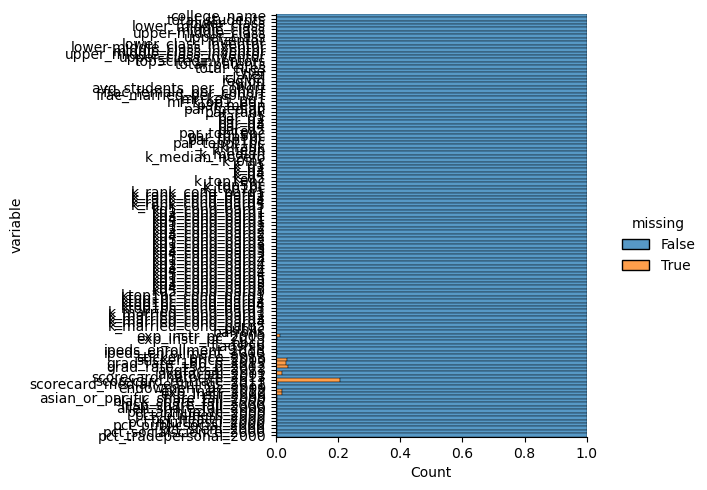

In [80]:
import seaborn as sns
sns.displot(
    data=merged_df2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [81]:
merged_df2.dropna(inplace=True)

In [82]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 420
Columns: 123 entries, college_name to pct_tradepersonal_2000
dtypes: bool(4), category(6), float64(100), int64(12), object(1)
memory usage: 283.3+ KB


/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

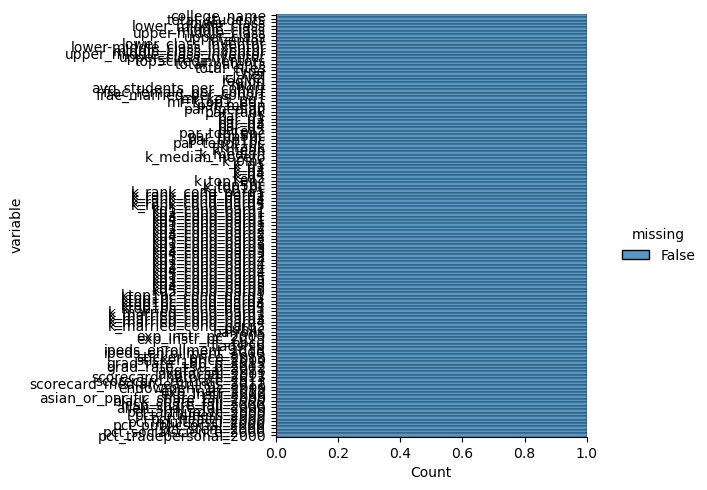

In [83]:
import seaborn as sns
sns.displot(
    data=merged_df2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [84]:
merged_df2.to_csv('post_lasso_data_cleaning.csv', index=False)

Next Steps:
1. Using this dataset, use lasso to figure out which variables are the most important.
2. Make a new dataset with only the important variables, drop columns.
3. Run log regression on the new dataset.
4. Tune the model